<a href="https://colab.research.google.com/github/AshuKoche/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Unsupervised-ML/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Zomato Restaurant Clustering And Sentiment Analysis**

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
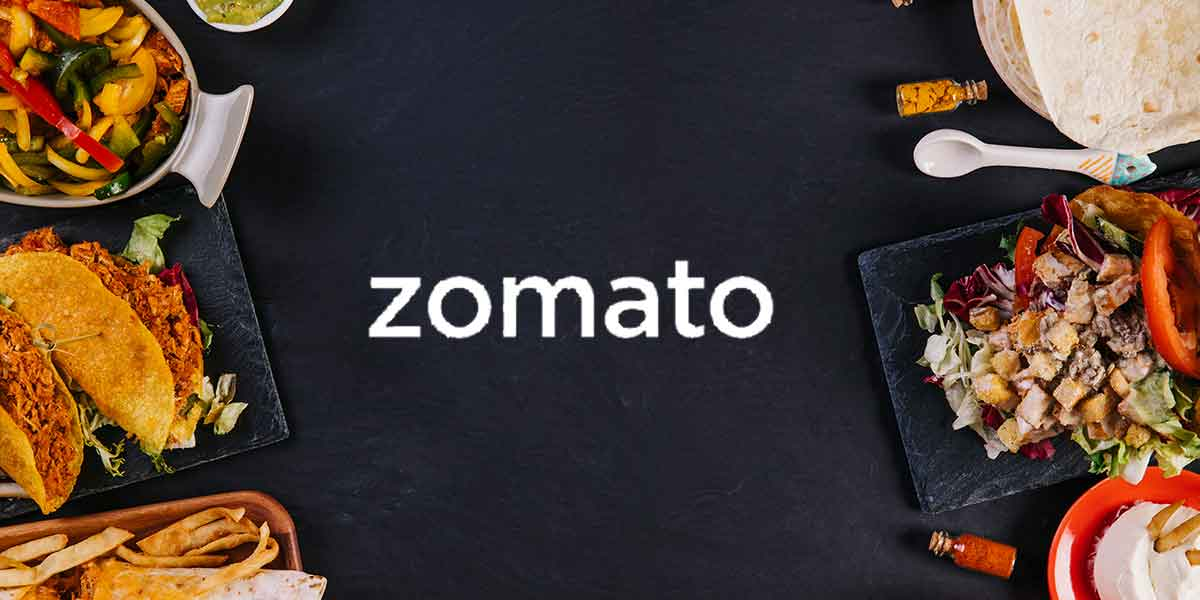

# **Project Summary -**

**Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus, and user reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. The restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts, and figures about the Indian food industry in each city. So, this project focuses on analyzing the Zomato restaurant data for each city in India.**

# **GitHub Link -**

https://github.com/AshuKoche/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Unsupervised-ML.git

# **Problem Statement**


**The Project focuses on Customers and the Company, we have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the Zomato restaurants into different segments. The data is visualized as it becomes easy to analyze data in at instant. The Analysis also solves some of the business cases that can directly help the customers find the Best restaurant in their locality and for the company to grow up and work in the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also, the data has valuable information about cuisine and cost which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also, the metadata of reviewers can be used for identifying the critics in the industry.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.5 MB/s eta 0:00:00


In [120]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import missingno as miss
import contractions
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
first_df = pd.read_csv('/content/drive/MyDrive/Alma Better /ML/Data/Zomato Restaurant names and Metadata.csv')
second_df = pd.read_csv('/content/drive/MyDrive/Alma Better /ML/Data/Zomato Restaurant reviews.csv')

In [6]:
import pandas as pd
print(pd.__version__)


1.5.3


In [7]:
import pickle
pickle.dump(first_df,open('df.pkl','wb'))

In [8]:
data = pickle.load(open('df.pkl','rb'))

In [9]:
data.iloc[0]

Name                                             Beyond Flavours
Links          https://www.zomato.com/hyderabad/beyond-flavou...
Cost                                                         800
Collections    Food Hygiene Rated Restaurants in Hyderabad, C...
Cuisines       Chinese, Continental, Kebab, European, South I...
Timings            12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)
Name: 0, dtype: object

### Dataset First View

In [10]:
# Dataset First Look
first_df

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [11]:
second_df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [12]:
second_df['Restaurant'].nunique()

100

### Dataset Rows & Columns count

In [13]:
# Dataset Rows & Columns count
print('The number of rows in first df is',len(first_df.index),'and number of columns is',len(first_df.columns))
print('The number of rows in second df is',len(second_df.index),'and number of columns is',len(second_df.columns))

The number of rows in first df is 105 and number of columns is 6
The number of rows in second df is 10000 and number of columns is 7


### Dataset Information

In [14]:
# Dataset Info
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [15]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [16]:
# Dataset Duplicate Value Count
print('The number of duplicated values in first df is',first_df.duplicated().sum())
print('The number of duplicated values in second df is',second_df.duplicated().sum())


The number of duplicated values in first df is 0
The number of duplicated values in second df is 36


#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
first_df.isnull().sum()


Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [18]:
second_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

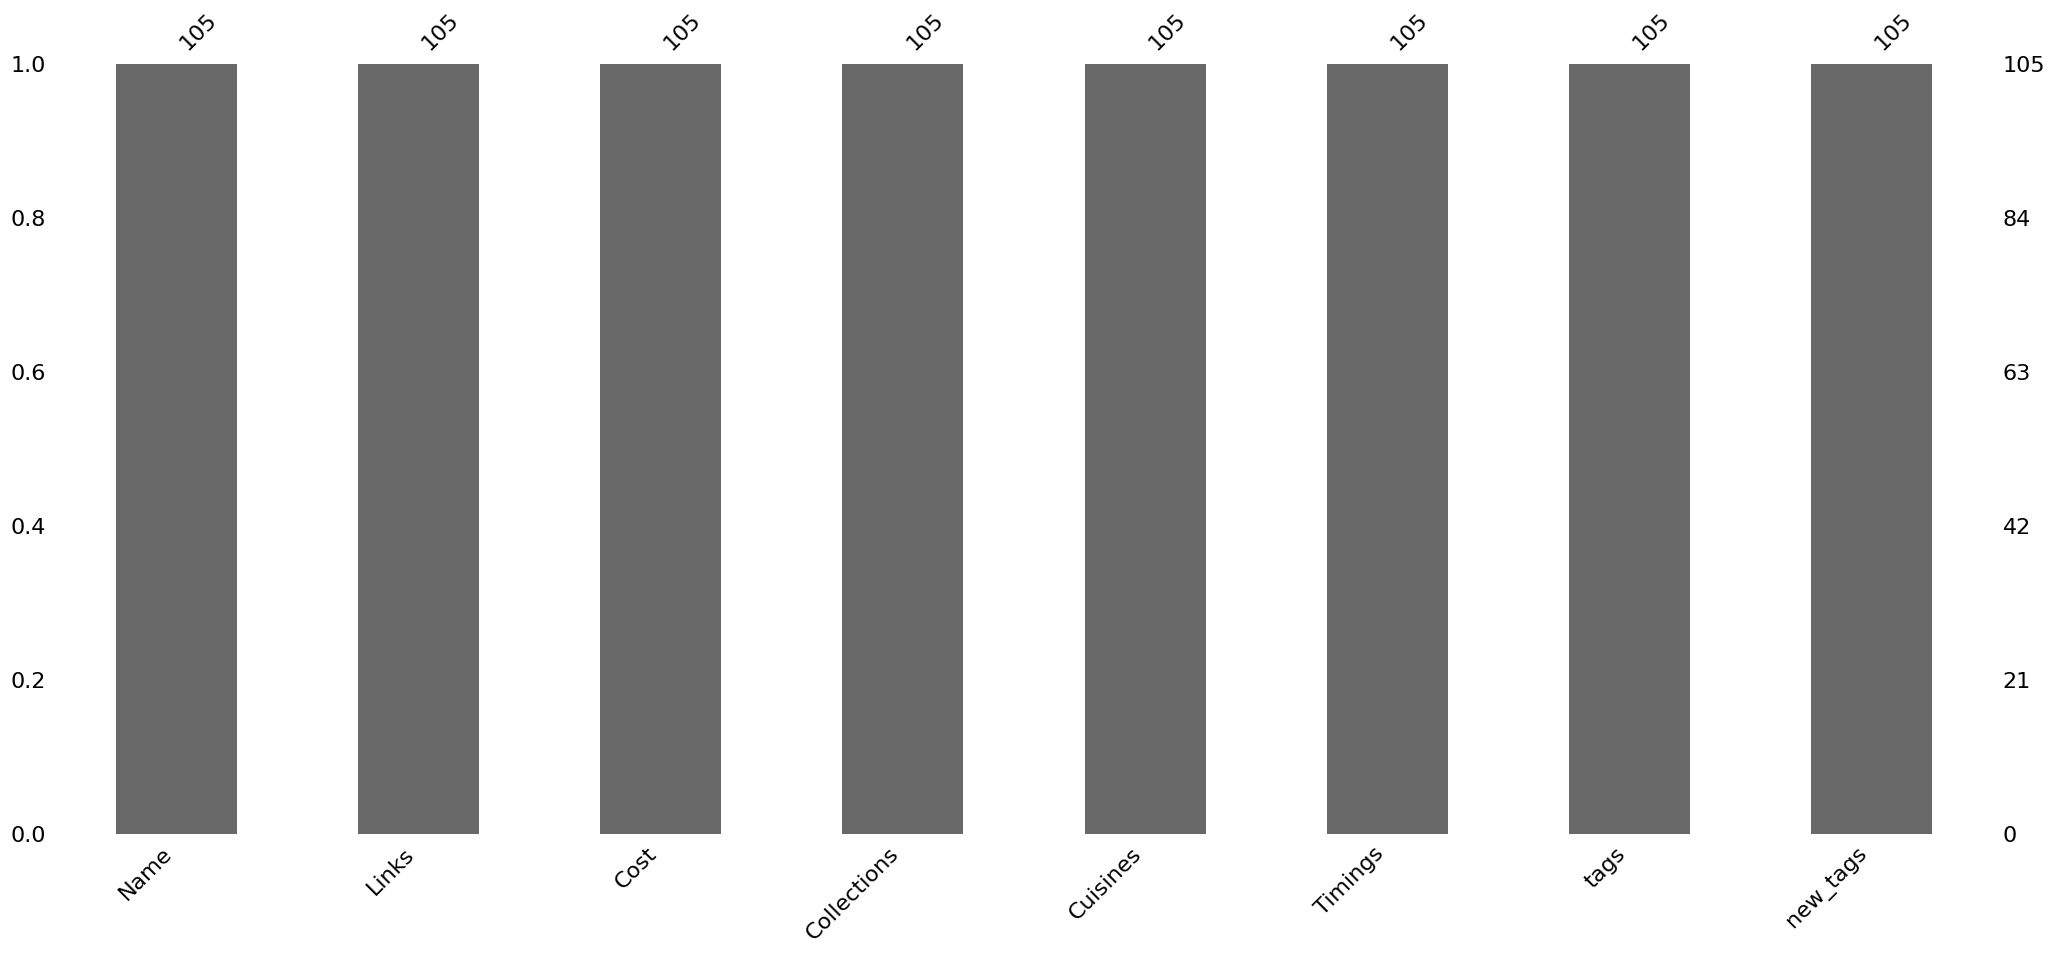

In [123]:
# Visualizing the missing values
miss.bar(first_df)

<Axes: >

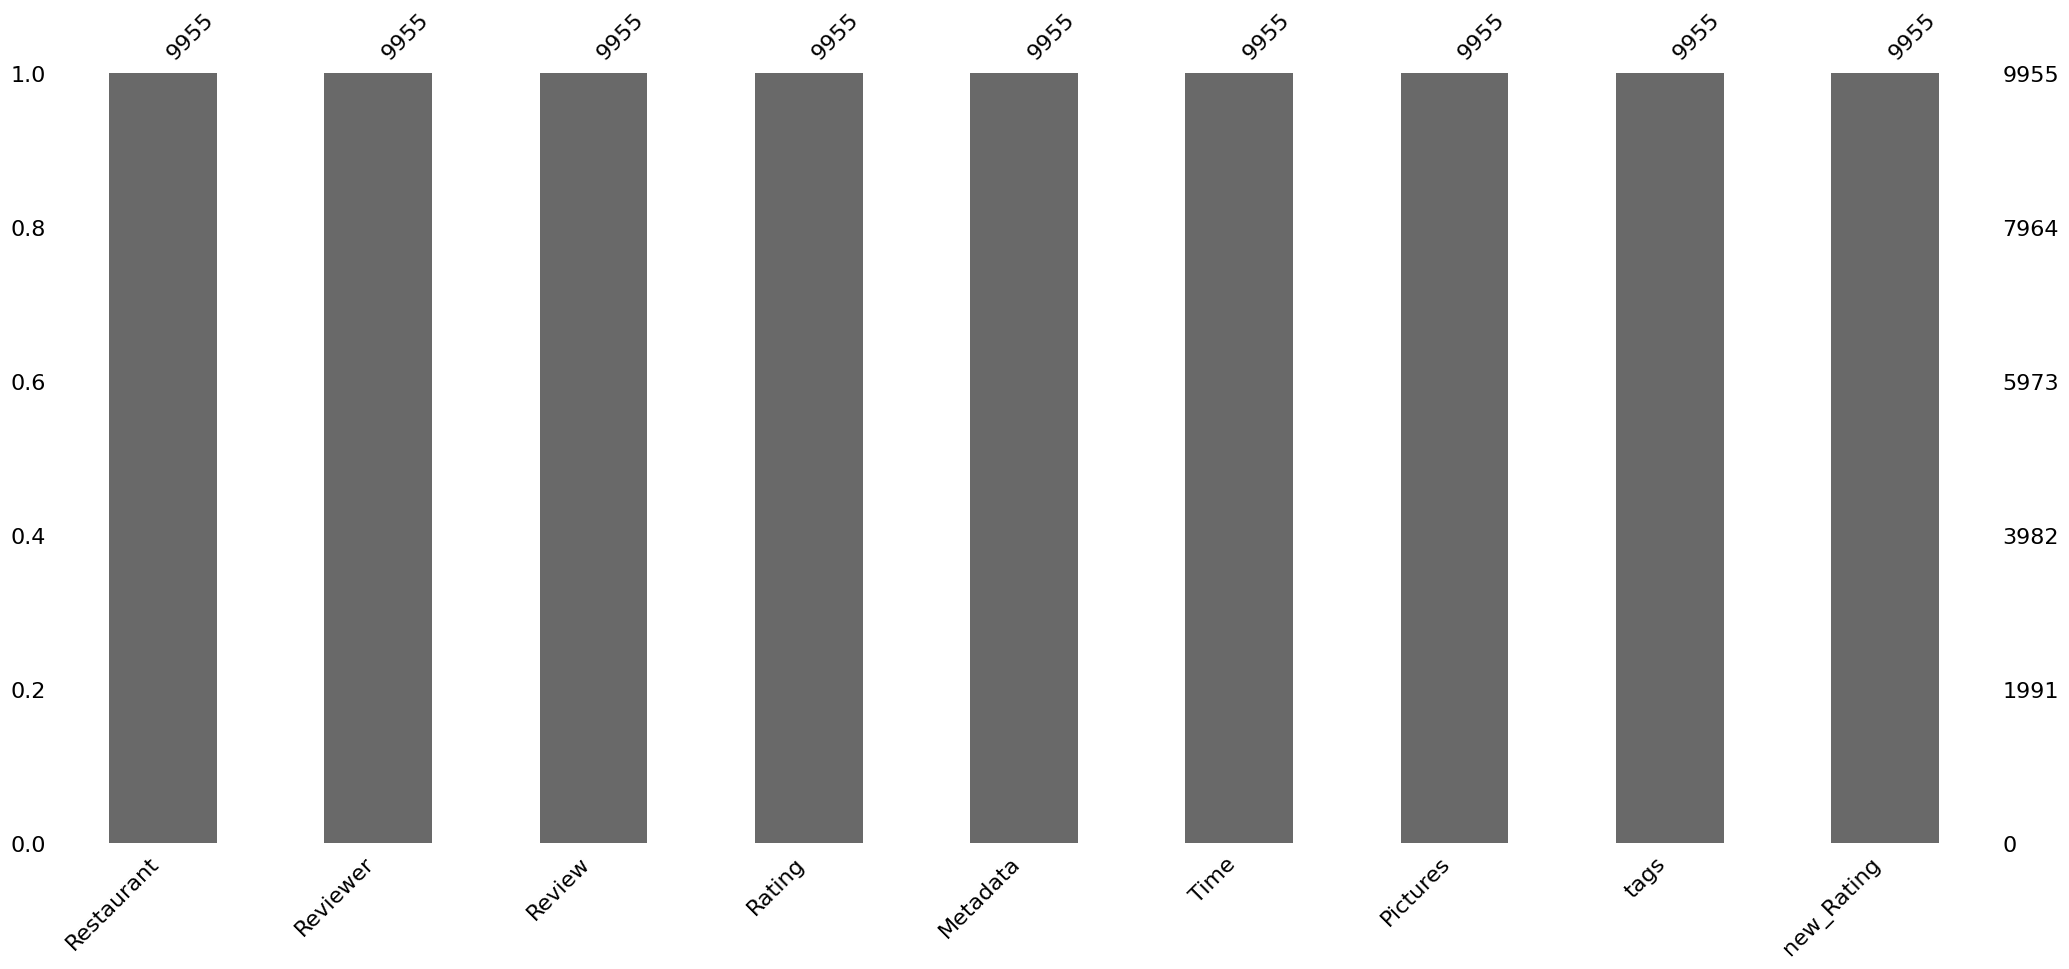

In [122]:
miss.bar(second_df)

### What did you know about your dataset?

**The First Dataset contains 54 null values in Collections column and 1 in Timings. Rest of the columns do not contain any null values. In Second Dataset contains 38 null values in Reviewer, 45 null values in Review, 38 null values in Rating, 38 null values in Metadata, 38 null values in Time.\
As we are analysing the Zomato-Restaurant, our classification model will be trained mostly on ratings.**

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
first_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [21]:
second_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [22]:
# Dataset Describe
first_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [23]:
second_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


So describe function is not so important here because, the features are not so important for the classification.

### Variables Description

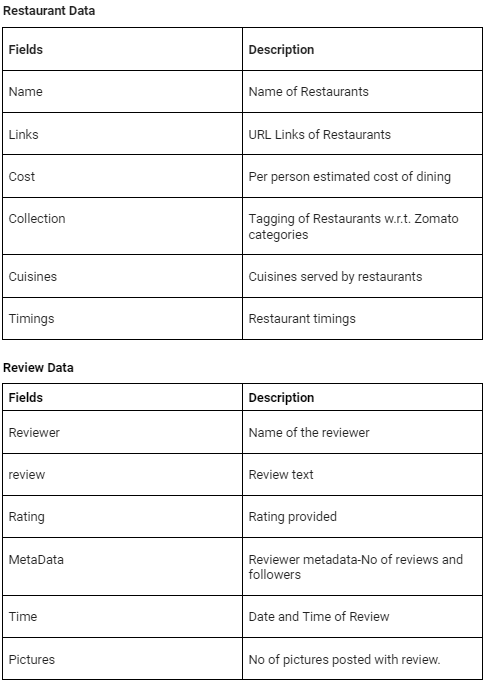

### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
for I in first_df.columns:
  print(f'Th number of unique values in the column {I} is {first_df[I].nunique()} ')

Th number of unique values in the column Name is 105 
Th number of unique values in the column Links is 105 
Th number of unique values in the column Cost is 29 
Th number of unique values in the column Collections is 42 
Th number of unique values in the column Cuisines is 92 
Th number of unique values in the column Timings is 77 


In [25]:
for I in second_df.columns:
  print(f'Th number of unique values in the column {I} is {second_df[I].nunique()} ')

Th number of unique values in the column Restaurant is 100 
Th number of unique values in the column Reviewer is 7446 
Th number of unique values in the column Review is 9364 
Th number of unique values in the column Rating is 10 
Th number of unique values in the column Metadata is 2477 
Th number of unique values in the column Time is 9782 
Th number of unique values in the column Pictures is 36 


## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
class Machine_Learning:
    """
    Machine Learning class to train and evaluate a model
    using training and testing datasets
    """
    def __init__(self , model ,X_train, X_test, y_train, y_test):
        """
        Initialize the model
        :param model: Machine Learning model
        Train and evaluate the machine learning model on the given datasets
        :param X_train: Training data
        :param X_test: Testing data
        :param y_train: Target variable for training data
        :param y_test: Target variable for testing data
        """
        self.model = model()
        self.X_train = X_train
        self.Y_train = y_train
        self.X_test = X_test
        self.Y_test = y_test


    def train_and_evaluate_machine(self,Model_name):

        # Instantiate the classifier and fit to the training data
        model =  self.model
        model.fit(self.X_train, self.Y_train)

        # Compute the training and testing accuracy
        train_accuracy = accuracy_score(self.Y_train, model.predict(self.X_train))
        test_accuracy = accuracy_score(self.Y_test, model.predict(self.X_test))

        # Print the accuracy scores
        print(f'Training accuracy for the given Model is : {train_accuracy}')
        print(f'Testing accuracy for the given Model is : {test_accuracy}')

        print(' ')
        # Print the Classification Report
        print(classification_report(self.Y_test, model.predict(self.X_test)))

        # Compute and plot the confusion matrix
        confusion = confusion_matrix(self.Y_test, model.predict(self.X_test))
        plt.figure(figsize=(6,5))
        sns.heatmap(confusion, annot=True)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion matrix for {Model_name}')
        plt.show()

    def Cross_validation(self , para_dict):
        """
        Perform cross-validation to find the best hyperparameters for the model
        :param para_dict: Hyperparameters for the model
        """

        self.model_cv = RandomizedSearchCV( self.model,n_iter=10, param_distributions = para_dict ,verbose = 5 , cv = 3, return_train_score= True)
        self.model_cv.fit(self.X_train, self.Y_train)
        print(' ')
        print(self.model_cv.best_params_)

In [27]:
# Write your code to make your dataset analysis ready.
first_df

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [28]:
second_df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [29]:
second_df[second_df['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [30]:
avg = 4
for i in second_df[second_df['Restaurant'] == 'The Old Madras Baking Company']['Rating']:
  if i != 'Like':
    avg += float(i)
avg_mean = avg/len(second_df[second_df['Restaurant'] == 'The Old Madras Baking Company']['Rating'])

In [31]:
second_df['Rating'][second_df['Rating']=='Like'] = avg_mean

In [32]:
second_df['Rating'] = second_df['Rating'].astype(float)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Restaurants and their Ratings

In [33]:
# Chart - 1 visualization code
rating=second_df.groupby('Restaurant')['Rating'].sum().reset_index().sort_values(by = 'Rating',ascending = False)
rating

,Restaurant,Rating
3,AB's - Absolute Barbecues,488.0
11,B-Dubs,481.0
2,"3B's - Buddies, Bar & Barbecue",476.0
67,Paradise,470.0
35,Flechazo,466.0
...,...,...
14,Behrouz Biryani,282.5
57,Mathura Vilas,282.0
66,Pakwaan Grand,271.0
10,Asian Meal Box,258.0


In [ ]:
# # Chart - 1 visualization code
# fig, ax = plt.subplots(figsize=(15, 6))
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# sns.barplot(rating, x = "Restaurant", y = "Rating")
# plt.xlabel('Restaurant')
# plt.ylabel('Rating')
# plt.title('Restaurant ratings')

#### Chart - 2

In [34]:
# Chart - 2 visualization code
cost = first_df.groupby('Name')['Cost'].sum().reset_index().rename(columns = {'Name':'Restaurant'})
cost

,Restaurant,Cost
0,10 Downing Street,"1,900"
1,13 Dhaba,450
2,"3B's - Buddies, Bar & Barbecue","1,100"
3,AB's - Absolute Barbecues,"1,500"
4,Absolute Sizzlers,750
...,...,...
100,Wich Please,250
101,Yum Yum Tree - The Arabian Food Court,"1,200"
102,Zega - Sheraton Hyderabad Hotel,"1,750"
103,Zing's Northeast Kitchen,550


In [ ]:
# sns.barplot(x=cost.index , y= Cost)
# plt.title('Restaurant Cost')
# plt.xlabel('Rastaurant')
# plt.ylabel('Cost')

#### Chart - 3

In [35]:
# Chart - 3 visualization code
comapre_df= pd.merge(cost,rating , on ='Restaurant',how = 'inner').sort_values(by = 'Rating',ascending = False).iloc[:15]
comapre_df

,Restaurant,Cost,Rating
3,AB's - Absolute Barbecues,"1,500",488.0
11,B-Dubs,"1,600",481.0
2,"3B's - Buddies, Bar & Barbecue","1,100",476.0
67,Paradise,800,470.0
35,Flechazo,"1,300",466.0
87,The Indi Grill,"1,500",460.0
97,Zega - Sheraton Hyderabad Hotel,"1,750",445.0
64,Over The Moon Brew Company,"1,200",434.0
16,Beyond Flavours,800,428.0
19,Cascade - Radisson Hyderabad Hitec City,"1,800",426.0


In [ ]:
# fig,ax = plt.subplots(figsize = [18,8])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# sns.barplot(x=comapre_df['Restaurant'], y= comapre_df['Cost'],hue = comapre_df['Rating'])

#### Chart - 4

In [36]:
second_df['Metadata'][8777] = 0,0

In [37]:
meta_df = second_df[~second_df['Metadata'].isnull()]
meta_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [38]:
meta_df['interaction'] = meta_df['Metadata'].apply(lambda x : x[0]+x[1])
meta_df['interaction'] =meta_df['interaction'].astype(int)

In [39]:
# Chart - 4 visualization code
meta_df['interaction']



0        1
1        3
2        2
3        1
4        3
        ..
9995    53
9996     2
9997    65
9998    13
9999    47
Name: interaction, Length: 9963, dtype: int64

#### Chart - 5

In [40]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [54]:
# Handling Missing Values & Missing Value Imputation
(first_df.isnull().sum()/len(first_df['Collections'])*100).round(2)

Name            0.00
Links           0.00
Cost            0.00
Collections    51.43
Cuisines        0.00
Timings         0.95
dtype: float64

In [55]:
first_df.fillna(' ',inplace = True)

In [56]:
(second_df.isnull().sum()/len(second_df['Metadata']))

Restaurant    0.0000
Reviewer      0.0038
Review        0.0045
Rating        0.0038
Metadata      0.0037
Time          0.0038
Pictures      0.0000
dtype: float64

In [57]:
second_df.dropna(inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

**There are 1 columns in the first dataset which shows the null values. Their are 51 instances where the Collections is missing. Certainly these missing values do not impact the other information related with the title. So I replaced all the null values with blank string, so that we could use the remaining information of the movies.**

### 2. Handling Outliers

In [58]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [59]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing for Content Based Filtering
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [60]:
def natural_language_processing(text):
    # Fix contractions
    first = contractions.fix(text)

    # Remove URLs
    without_urls = re.sub(r'http\S+|www\S+', '', first)

    # Convert to lowercase
    second = without_urls.lower()

    # Remove punctuation
    punct = set(string.punctuation)
    third = ''.join([i for i in second if i not in punct])

    # Remove white spaces
    fourth = re.sub('\s+', ' ', third).strip()

    # Remove stopwords
    stop = set(stopwords.words('english'))
    fifth = ' '.join([i for i in fourth.split() if i not in stop])

    # Tokenize words
    word_tokens = word_tokenize(fifth)

    # Replace words with synonyms
    rephrased_sentence = []
    for word in word_tokens:
        synonyms = wordnet.synsets(word)
        if len(synonyms) > 0:
            wor = synonyms[0].lemmas()[0].name()
        else:
            wor = word
        rephrased_sentence.append(wor)

    # Join rephrased words
    sixth = ' '.join(rephrased_sentence)

    # Tokenize words again
    seventh = word_tokenize(sixth)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    eighth = ' '.join([lemmatizer.lemmatize(i) for i in seventh])

    return eighth


#### **Beginning of the Conten based filtering**

In [61]:
first_df['tags'] = first_df['Links'] + first_df['Collections'] + first_df['Cuisines']

In [62]:
first_df['new_tags'] = first_df['tags'].apply(natural_language_processing)

#### 10. Text Vectorization

In [63]:
# Vectorizing Text
tfidf = TfidfVectorizer()
hotel_bag_tf=tfidf.fit_transform(first_df['new_tags'].values).toarray()

In [64]:
hotel_bag_tf.shape

(105, 135)

In [65]:
words=hotel_bag_tf.sum(axis = 0)
high_word =sorted(words,reverse =  True)

index_wor= np.flip(np.argsort(words))[:15]
index_wor
res_array=np.zeros([index_wor.shape[0],words.shape[0]])
res_array.shape

(15, 135)

In [66]:
for i,j in enumerate(index_wor):
  res_array[i,j] = 1
high_freq_words=tfidf.inverse_transform(res_array)
high_freq_words

[array(['indian'], dtype='<U19'),
 array(['north'], dtype='<U19'),
 array(['chinese'], dtype='<U19'),
 array(['food'], dtype='<U19'),
 array(['biryani'], dtype='<U19'),
 array(['fast'], dtype='<U19'),
 array(['continental'], dtype='<U19'),
 array(['asian'], dtype='<U19'),
 array(['dessert'], dtype='<U19'),
 array(['italian'], dtype='<U19'),
 array(['mughlai'], dtype='<U19'),
 array(['south'], dtype='<U19'),
 array(['bakery'], dtype='<U19'),
 array(['cafe'], dtype='<U19'),
 array(['andhra'], dtype='<U19')]

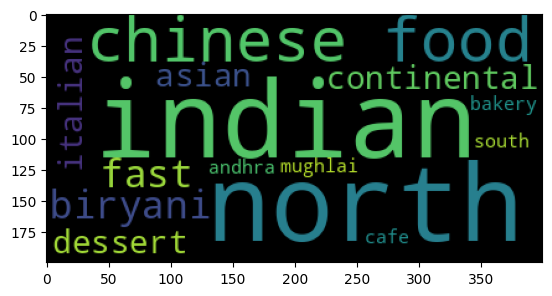

In [67]:
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud().generate(' '.join([i[0] for i in high_freq_words]))
plt.imshow(wordcloud)

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Textual Data Preprocessing for Sentiment Analysis
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [68]:
def natural_language_processing(text):

    # Fix contractions
    first = contractions.fix(text)

    # Remove URLs
    without_urls = re.sub(r'http\S+|www\S+', '', first)

    # Convert to lowercase
    second = without_urls.lower()

    # Remove punctuation
    punct = set(string.punctuation)
    third = ''.join([i for i in second if i not in punct])

    # Remove white spaces
    fourth = re.sub('\s+', ' ', third).strip()

    # Remove stopwords
    stop = set(stopwords.words('english'))
    fifth = ' '.join([i for i in fourth.split() if i not in stop])

    # Tokenize words
    word_tokens = word_tokenize(fifth)

    # Replace words with synonyms
    rephrased_sentence = []
    for word in word_tokens:
        synonyms = wordnet.synsets(word)
        if len(synonyms) > 0:
            wor = synonyms[0].lemmas()[0].name()
        else:
            wor = word
        rephrased_sentence.append(wor)

    # Join rephrased words
    sixth = ' '.join(rephrased_sentence)

    # Tokenize words again
    seventh = word_tokenize(sixth)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    eighth = ' '.join([lemmatizer.lemmatize(i) for i in seventh])

    return eighth


#### **Beginning of the Sentiment Analysis**

In [69]:
second_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [70]:
second_df['tags'] = second_df['Review'].apply(natural_language_processing)

In [71]:
second_df['tags'].values

array(['atmosphere good food quite good Saturday lunch cost effective good topographic_point satiate brunch one besides chill friend parent waiter soumen hyrax truly courteous helpful',
       'atmosphere good pleasant evening service prompt food good good experience soumen hyrax praise service',
       'must attempt great food great atmosphere thnx service pradeep subroto personal recommendation penne alfredo pasta besides music background amaze',
       ...,
       'bad evaluation chiefly chicken bone found vegetable food acceptable vegetarian satiate craving Chinese food head Chinese pavilion besides voucher available little app lunch tray roentgen 310 vegetable well fuss voucher monetary_value vegetable lunch tray roentgen 275 tax restaurant atmosphere decent since noon many table busy pretty quite thrusday special vegetable hot sour soup Oklahoma well sprout crunchy mouth something different kimchi salad personally never affectionate potato plum sauce good well make brocolli baby 

#### 10. Text Vectorization

In [72]:
# Vectorizing Text
tfidf2 = TfidfVectorizer()
sentiment_bag=tfidf2.fit_transform(second_df['tags'].values).toarray()

In [73]:
sentiment_bag.shape

(9955, 15439)

In [74]:
sum_words=sentiment_bag.sum(axis = 0)
sorted_freq =sorted(sum_words,reverse =  True)

high_freq_word= np.flip(np.argsort(sum_words))[:15]
high_freq_word
new_array=np.zeros([high_freq_word.shape[0],sum_words.shape[0]])
new_array.shape

(15, 15439)

In [75]:
for i,j in enumerate(high_freq_word):
  new_array[i,j] = 1
most_freq=tfidf2.inverse_transform(new_array)
most_freq

[array(['good'], dtype='<U170'),
 array(['food'], dtype='<U170'),
 array(['topographic_point'], dtype='<U170'),
 array(['service'], dtype='<U170'),
 array(['order'], dtype='<U170'),
 array(['taste'], dtype='<U170'),
 array(['chicken'], dtype='<U170'),
 array(['nice'], dtype='<U170'),
 array(['atmosphere'], dtype='<U170'),
 array(['time'], dtype='<U170'),
 array(['great'], dtype='<U170'),
 array(['one'], dtype='<U170'),
 array(['biryani'], dtype='<U170'),
 array(['visit'], dtype='<U170'),
 array(['truly'], dtype='<U170')]

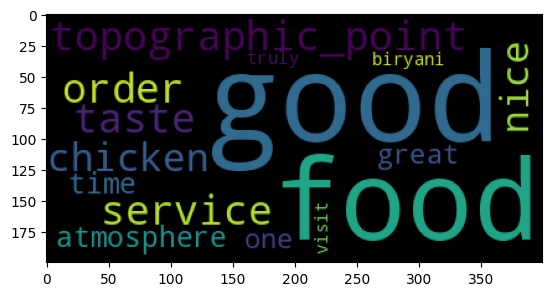

In [76]:
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud().generate(' '.join([i[0] for i in most_freq]))
plt.imshow(wordcloud)

##### Which text vectorization technique have you used and why?

**WordCLoud is providing a brief idea about the most frequent word. In vectorization I have implemented term frequency and inverse document frequency. So the word good has maximum frequency, followed by food.**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [77]:
second_df['Rating'].value_counts()

5.00    3826
4.00    2373
1.00    1735
3.00    1192
2.00     684
4.50      69
3.50      47
2.50      19
1.50       9
3.62       1
Name: Rating, dtype: int64

In [78]:
# Manipulate Features to minimize feature correlation and create new features
second_df['new_Rating'] = second_df['Rating'].round()

In [79]:
second_df['new_Rating']=second_df['new_Rating'].astype(int)

In [80]:
second_df['new_Rating'].value_counts()

5    3826
4    2490
1    1735
3    1192
2     712
Name: new_Rating, dtype: int64

In [81]:
second_df.replace({'new_Rating':{5:0,4:0,3:0,2:1}},inplace = True)

#### 2. Feature Selection

In [82]:
# Select your features wisely to avoid overfitting
independent_variable = sentiment_bag
dependent_variable = second_df['new_Rating']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [83]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

pca = PCA()
pca_features=pca.fit_transform(sentiment_bag)

In [84]:
pca_features.shape

(9955, 9955)

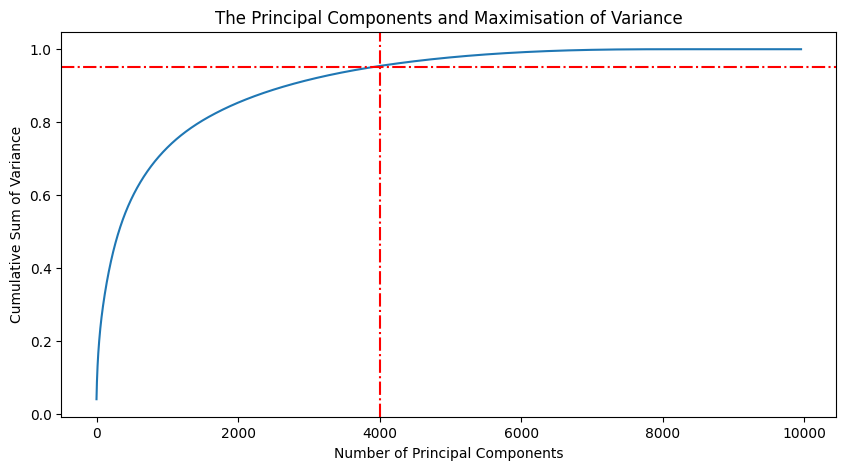

In [85]:
#Analysing the variance for different number of features and plotting the graph

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('The Principal Components and Maximisation of Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Sum of Variance')
plt.axhline(0.95,color='r',linestyle= '-.')
plt.axvline(4000,color='r',linestyle= '-.')

In [86]:
pca = PCA(n_components = 4000)
final_features=pca.fit_transform(sentiment_bag)

In [87]:
final_features.shape

(9955, 4000)

### 8. Data Splitting

In [88]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test , y_train,y_test = train_test_split(sentiment_bag,second_df['new_Rating'].values,test_size = 0.2,random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7964, 15439) (1991, 15439)
(7964,) (1991,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [89]:
# Handling Imbalanced Dataset (If needed)
second_df['new_Rating'].value_counts()

0    7508
1    2447
Name: new_Rating, dtype: int64

In [90]:
from imblearn.over_sampling import SMOTE

x_oversampled, y_oversampled = SMOTE(
    random_state=2023,).fit_resample(X_train ,y_train)

In [91]:
y_oversampled.shape

(12052,)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

## Sentiment Analysis

### ML Model - 1

Training accuracy for the given Model is : 0.9929472286757385
Testing accuracy for the given Model is : 0.8884982420894023
 
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1482
           1       0.79      0.77      0.78       509

    accuracy                           0.89      1991
   macro avg       0.86      0.85      0.85      1991
weighted avg       0.89      0.89      0.89      1991



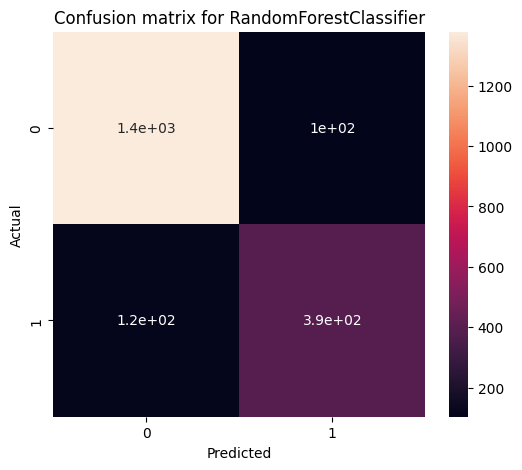

In [92]:
#line of code is calling the function train_and_evaluate_machine() with four arguments:
#The train_and_evaluate_machine() function is responsible for training the model using the training data set and evaluating its
#performance using the test data set. The specific implementation of this function will depend on the algorithm being used.
'''Purpose of this line of code is to use the Multinomial Naive Bayes algorithm to train and evaluate a machine learning
   model using a specific training and test data set. The results of this evaluation
   can then be used to assess the performance of the algorithm and compare it to other algorithms or variations of the same algorithm.'''


# ML Model - 1 Implementation

Ml_model1 = Machine_Learning(RandomForestClassifier,x_oversampled , X_test ,y_oversampled,y_test)

# Fit the Algorithm
Ml_model1.train_and_evaluate_machine('RandomForestClassifier')
# Predict on the model

Training accuracy for the given Model is : 0.9939728779507785
Testing accuracy for the given Model is : 0.8829733802109493
 
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1482
           1       0.89      0.62      0.73       509

    accuracy                           0.88      1991
   macro avg       0.89      0.80      0.83      1991
weighted avg       0.88      0.88      0.88      1991



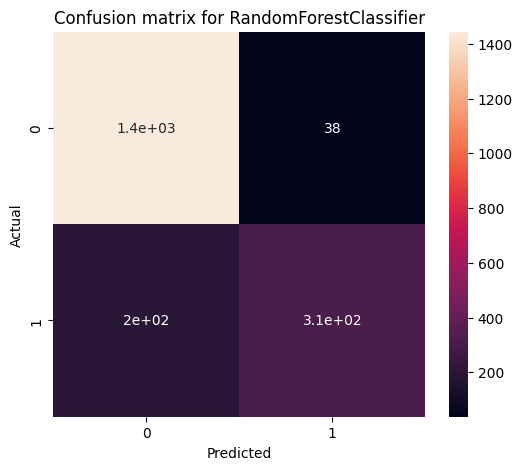

In [93]:
Ml_model1 = Machine_Learning(RandomForestClassifier,X_train , X_test ,y_train,y_test)

# Fit the Algorithm
Ml_model1.train_and_evaluate_machine('RandomForestClassifier')
# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:



params_rf = {
    'n_estimators': [150, 200],
    'max_depth': [ 15, 20,30],
    'min_samples_split': [5, 10],
    'max_features': ['sqrt','log2']
}
# Fit the Algorithm
Ml_model1.Cross_validation( params_rf)
# Predict on the model


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=150;, score=(train=0.817, test=0.789) total time=  14.3s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=150;, score=(train=0.820, test=0.787) total time=  14.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=150;, score=(train=0.809, test=0.783) total time=  14.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=(train=0.872, test=0.825) total time=  24.3s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=(train=0.867, test=0.812) total time=  24.6s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=(train=0.870, test=0.823) total time=  24.8s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=(train=0.819, test=

In [97]:
# Fitting the model with best hyperparameters.
RFC_best = RandomForestClassifier(n_estimators=150,min_samples_split= 10,max_features = 'sqrt', max_depth = 30)
RFC_best.fit(x_oversampled ,y_oversampled)

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=150)

In [98]:
train_accuracy = accuracy_score(y_oversampled, RFC_best.predict(x_oversampled))
test_accuracy = accuracy_score(y_test, RFC_best.predict(X_test))
print('The train accuracy for the given best model is', train_accuracy)
print('The test accuracy for the given best model is', test_accuracy)

The train accuracy for the given best model is 0.9488051775638898
The test accuracy for the given best model is 0.8729281767955801


In [99]:
confusion_matrix(y_test,RFC_best.predict(X_test))

array([[1333,  149],
       [ 104,  405]])

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [100]:
from sklearn.ensemble import HistGradientBoostingClassifier

# This is my Second Model
Ml_model2 = Machine_Learning(HistGradientBoostingClassifier,x_oversampled , X_test ,y_oversampled,y_test)

Training accuracy for the given Model is : 0.9552771324261533
Testing accuracy for the given Model is : 0.8854846810647916
 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1482
           1       0.75      0.82      0.79       509

    accuracy                           0.89      1991
   macro avg       0.85      0.86      0.85      1991
weighted avg       0.89      0.89      0.89      1991



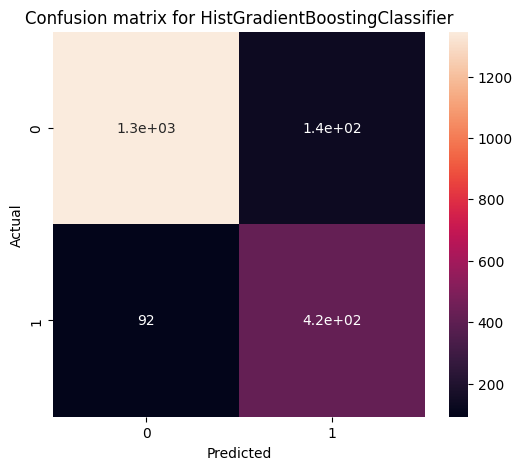

In [101]:
Ml_model2.train_and_evaluate_machine('HistGradientBoostingClassifier')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [102]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
HGB_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [5,8],
    'min_samples_leaf': [1, 5, 20]
}
# Implementing the cross vaidation for the model
Ml_model2.Cross_validation(HGB_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=5;, score=(train=0.934, test=0.858) total time= 2.1min
[CV 2/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=5;, score=(train=0.920, test=0.906) total time= 2.2min
[CV 3/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=5;, score=(train=0.918, test=0.912) total time= 2.0min
[CV 1/3] END learning_rate=0.01, max_depth=5, min_samples_leaf=1;, score=(train=0.857, test=0.790) total time= 2.3min
[CV 2/3] END learning_rate=0.01, max_depth=5, min_samples_leaf=1;, score=(train=0.843, test=0.856) total time= 2.2min
[CV 3/3] END learning_rate=0.01, max_depth=5, min_samples_leaf=1;, score=(train=0.840, test=0.856) total time= 2.3min
[CV 1/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=20;, score=(train=0.949, test=0.864) total time= 3.0min
[CV 2/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=20;, score=(train=0.931, test=0.913) total time= 4.4mi

In [104]:
HGB_best = HistGradientBoostingClassifier(min_samples_leaf = 20, max_depth = 5,learning_rate = 0.1)
HGB_best.fit(x_oversampled,y_oversampled)

HistGradientBoostingClassifier(max_depth=5)

In [105]:
train_accuracy = accuracy_score(y_oversampled, HGB_best.predict(x_oversampled))
test_accuracy = accuracy_score(y_test , HGB_best.predict(X_test))
print('The training accuracy score for the model is', train_accuracy)
print('The testing accuracy score for the model is', test_accuracy)

The training accuracy score for the model is 0.9095585794888815
The testing accuracy score for the model is 0.8623807132094425


In [106]:
confusion_matrix(y_test,HGB_best.predict(X_test))

array([[1298,  184],
       [  90,  419]])

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

Training accuracy for the given Model is : 0.9589279787587123
Testing accuracy for the given Model is : 0.8724259166248116
 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1482
           1       0.72      0.81      0.76       509

    accuracy                           0.87      1991
   macro avg       0.83      0.85      0.84      1991
weighted avg       0.88      0.87      0.87      1991



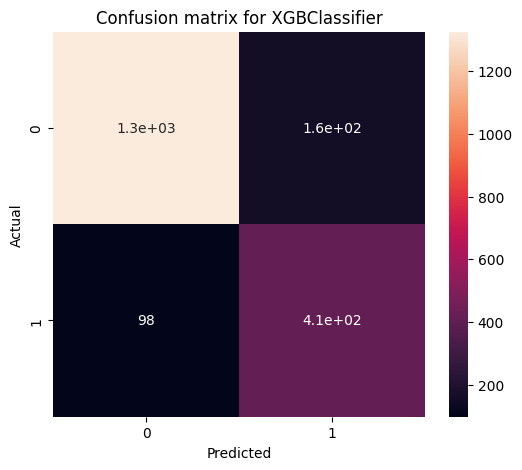

In [107]:
# ML Model - 3 Implementation

ML_model3 = Machine_Learning(XGBClassifier,x_oversampled , X_test ,y_oversampled,y_test)

# Fit the Algorithm
ML_model3.train_and_evaluate_machine('XGBClassifier' )

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [108]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
# Fit the Algorithm
ML_model3.Cross_validation(params)
# Predict on the model

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8;, score=(train=0.954, test=0.858) total time= 5.2min
[CV 2/3] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8;, score=(train=0.938, test=0.919) total time= 5.2min
[CV 3/3] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8;, score=(train=0.937, test=0.928) total time= 5.2min
[CV 1/3] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=(train=0.934, test=0.858) total time= 4.0min
[CV 2/3] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=(train=0.915, test=0.908) total time= 4.0min
[CV 3/3] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=(train=0.911, test=0.918) total time= 4.0min
[CV 1/3] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_we

In [110]:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 0.8}

{'subsample': 1.0,
 'min_child_weight': 5,
 'max_depth': 5,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **Content Based Filtering.**

In [111]:
hotel_bag_tf.shape

(105, 135)

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(hotel_bag_tf)

In [113]:
def hotel_recommendation(hotel_name):

  print('Hey!! Gyus, Checkout these Amazing Places')
  print(' ')
  index = first_df[first_df['Name']== hotel_name].index[0]
  similar_content = sorted(list(enumerate(similarities[index])),reverse = True , key = lambda x: x[-1])

  recommendation=[]
  cuisines = []
  rating=[]
  review = []

  for i,j in similar_content[:10]:
    recommendation.append(first_df['Name'][i])
    cuisines.append(rec_df[rec_df['Name']== first_df['Name'][i]]['Name'].iloc[0])
    rating.append(rec_df[rec_df['Name']== first_df['Name'][i]]['Rating'].iloc[0])
    review.append(rec_df[rec_df['Name']== first_df['Name'][i]]['Review'].iloc[0])

  return (recommendation , cuisines , rating, review)

In [114]:
text ='atmosphere nice food quite nice Saturday lunch cost effective  topographic_point satiate brunch one besides chill friend parent \
waiter soumen hyrax truly courteous '

In [115]:
def processed_text(text):
  first = natural_language_processing(text)
  vectors = tfidf2.transform([first]).toarray()
  result = RFC_best.predict(vectors)
  if result[0] == 0:
    print('The Review is Good, You can prefer this Hotel.')
  else:
    print('The Review is Not so Good, there are plenty other options.')


In [116]:
processed_text(text)

The Review is Good, You can prefer this Hotel.


In [117]:
import pickle
pickle.dump(RFC_best, open('model_new.pickle', 'wb'))

## Just IMplimentation Test Further Work




In [124]:
import scipy.cluster.hierarchy as shc

<function matplotlib.pyplot.show(close=None, block=None)>

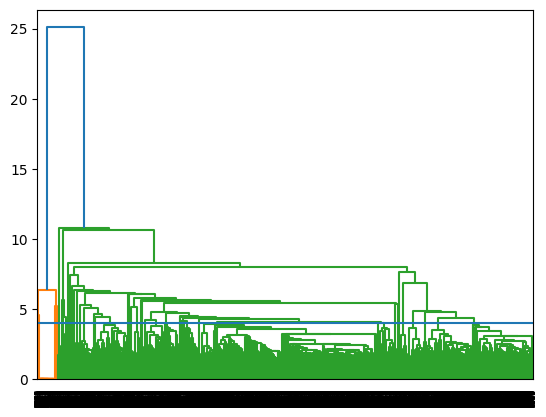

In [125]:
shc.dendrogram(shc.linkage(final_features,'ward'))
plt.axhline(y=4)

plt.show

# **Conclusion**